In [1]:
!pip install matplotlib opencv-python numpy pandas sklearn tensorflow

You should consider upgrading via the 'C:\Users\dmife\Desktop\Z. Personal\Universirty\Diploma work\diploma\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.utils import shuffle

In [3]:
# main variables
data_path = "apple_disease_classification\Train"
test_path = "apple_disease_classification\Test"

prep = [r"C:\Users\dmife\Desktop\Z. Personal\Universirty\Diploma work\apple_disease_classification\Test\Blotch_Apple\134.jpg",
 r"C:\Users\dmife\Desktop\Z. Personal\Universirty\Diploma work\apple_disease_classification\Test\Blotch_Apple\141.jpg",
 r"C:\Users\dmife\Desktop\Z. Personal\Universirty\Diploma work\apple_disease_classification\Test\Normal_Apple\69.jpg",
 r"C:\Users\dmife\Desktop\Z. Personal\Universirty\Diploma work\apple_disease_classification\Test\Normal_Apple\57.jpg",
 r"C:\Users\dmife\Desktop\Z. Personal\Universirty\Diploma work\apple_disease_classification\Test\Rot_Apple\aybx08.jpg",
 r"C:\Users\dmife\Desktop\Z. Personal\Universirty\Diploma work\apple_disease_classification\Test\Rot_Apple\istockphoto-859980682-612x612.jpg",
 r"C:\Users\dmife\Desktop\Z. Personal\Universirty\Diploma work\apple_disease_classification\Test\Scab_Apple\AnyConv.com__images (38).jpg",
 r"C:\Users\dmife\Desktop\Z. Personal\Universirty\Diploma work\apple_disease_classification\Test\Scab_Apple\rp3fh8.jpg",
 r"C:\Users\dmife\Desktop\Z. Personal\Universirty\Diploma work\apple_disease_classification\Test\Scab_Apple\F4134795-7A74-49F2-AD2D-C359C79B0852.jpeg",
]


# test preprocessing
for img_path in prep:
    img = cv2.imread(img_path)
    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

    # Sobel Edge Detection
    sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
    # Display Sobel Edge Detection Images
    # cv2.imshow('Sobel X', sobelx)
    # cv2.waitKey(0)
    # cv2.imshow('Sobel Y', sobely)
    # cv2.waitKey(0)
    # cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
    # cv2.waitKey(0)

    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
    # Display Canny Edge Detection Image
    cv2.imshow('Canny Edge Detection', edges)
    cv2.waitKey(0)

    cv2.destroyAllWindows()

import cv2
import numpy as np
low_apple_red = (160.0, 153.0, 153.0)
high_apple_red = (180.0, 255.0, 255.0)
low_apple_raw = (0.0, 150.0, 150.0)
high_apple_raw = (15.0, 255.0, 255.0)

for img_path in prep:
    image_bgr = cv2.imread(img_path)
    image = image_bgr.copy()
    image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

    mask_red = cv2.inRange(image_hsv,low_apple_red, high_apple_red)
    mask_raw = cv2.inRange(image_hsv,low_apple_raw, high_apple_raw)

    mask = mask_red + mask_raw


    cnts,_ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c_num=0
    for i,c in enumerate(cnts):
        # draw a circle enclosing the object
        ((x, y), r) = cv2.minEnclosingCircle(c)
        if r>34:
            c_num+=1
            cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
            cv2.putText(image, "#{}".format(c_num), (int(x) - 10, int(y)), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
        else:
            continue

    cv2.imshow("Original image", image_bgr)
    cv2.imshow("Detected Apples", image)
    #cv2.imshow("HSV Image", image_hsv)
    #cv2.imshow("Mask image", mask)
    cv2.waitKey(0)

In [4]:
def load_images(folder):
    images, labels = [], []
    for fruit_type in os.listdir(data_path):
        fruit_type_data_path = os.path.join(data_path, fruit_type)
        
        for image in os.listdir(fruit_type_data_path):
            images.append(cv2.imread(os.path.join(fruit_type_data_path, image)))
            labels.append(fruit_type)

    return shuffle(images, labels, random_state=25)

In [5]:


images_train, labels_train = load_images(data_path)

test = "apple_disease_classification\\Train\\Blotch_Apple\\10.jpg"
test = cv2.imread(test)

cv2.imshow('sample image', test)
 
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() #

img = cv2.imread("apple_disease_classification\\Train\\Blotch_Apple\\10.jpg")
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## Using Keras

In [6]:
# https://www.tensorflow.org/tutorials/images/classification

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 382 files belonging to 4 classes.
Using 344 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 382 files belonging to 4 classes.
Using 38 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


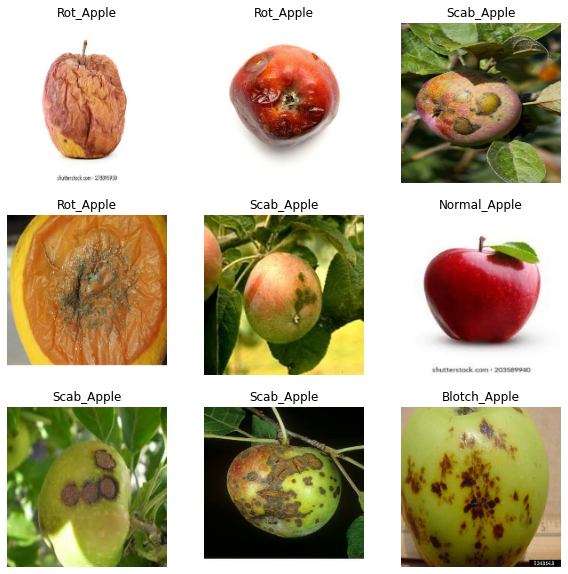

In [11]:
plt.figure(figsize=(10, 10))
prep = [] 
for images, labels in train_ds.take(1):
  for i in range(9):
    prep.append(images[i]) 
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
# Configure dataset for perfomance

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer = layers.Rescaling(1./255)

In [14]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [15]:
# Create a model

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [18]:
# train the model

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
11/11 [==============================] - 5s 401ms/step - loss: 1.7731 - accuracy: 0.3430 - val_loss: 1.3211 - val_accuracy: 0.2895
Epoch 2/10
11/11 [==============================] - 4s 390ms/step - loss: 1.1391 - accuracy: 0.4855 - val_loss: 1.0403 - val_accuracy: 0.5789
Epoch 3/10
11/11 [==============================] - 4s 381ms/step - loss: 0.8780 - accuracy: 0.6628 - val_loss: 0.8884 - val_accuracy: 0.6316
Epoch 4/10
11/11 [==============================] - 4s 384ms/step - loss: 0.6642 - accuracy: 0.7733 - val_loss: 0.8727 - val_accuracy: 0.6316
Epoch 5/10
11/11 [==============================] - 4s 408ms/step - loss: 0.4917 - accuracy: 0.8081 - val_loss: 0.8484 - val_accuracy: 0.6316
Epoch 6/10
11/11 [==============================] - 5s 432ms/step - loss: 0.3958 - accuracy: 0.8488 - val_loss: 0.9889 - val_accuracy: 0.6316
Epoch 7/10
11/11 [==============================] - 4s 402ms/step - loss: 0.2980 - accuracy: 0.8953 - val_loss: 0.7768 - val_accuracy: 0.7105
Epoch 

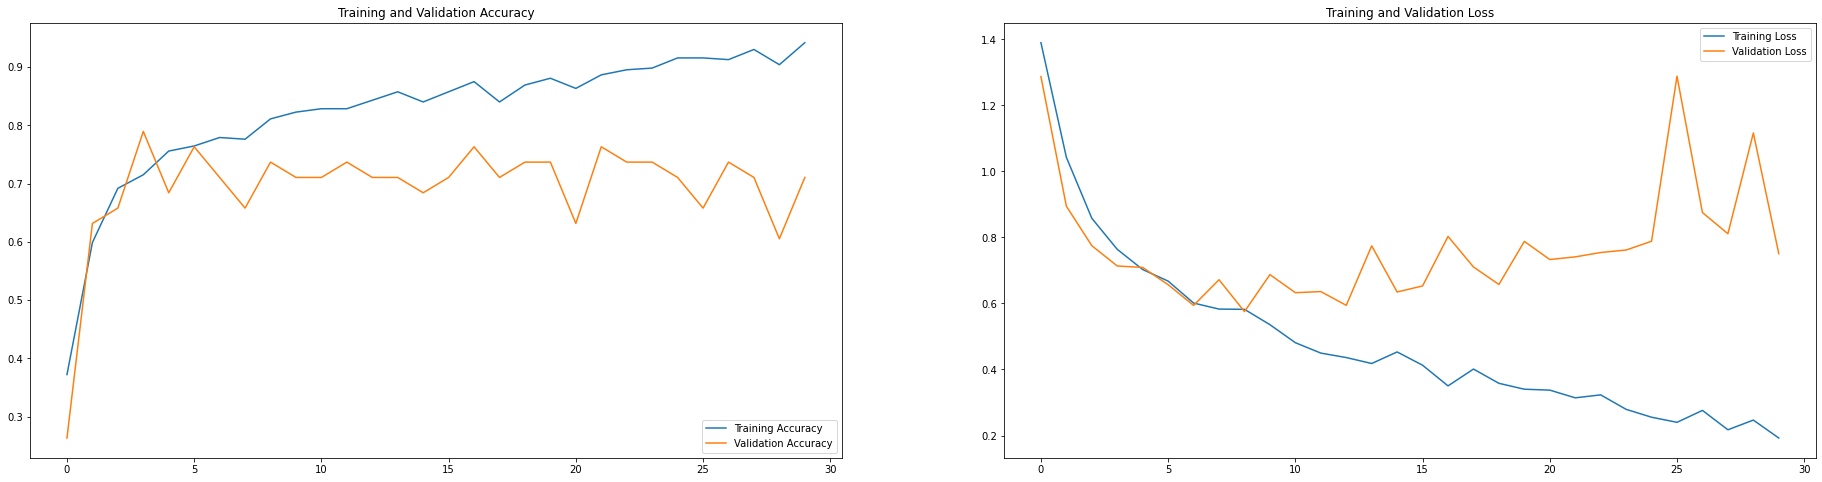

In [29]:
# model's results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(32, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

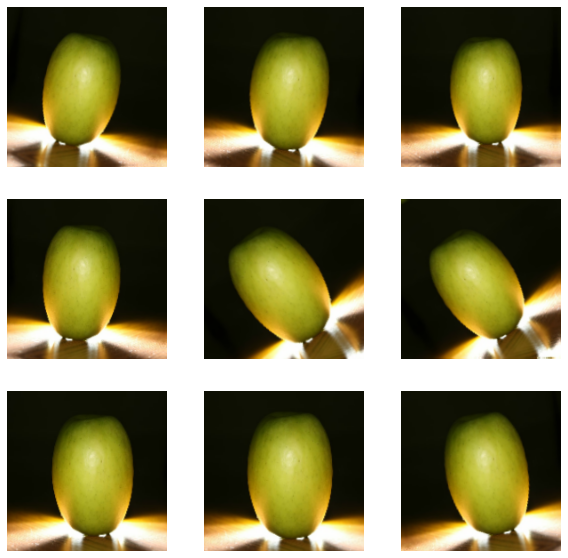

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [22]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [25]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
11/11 [==============================] - 7s 486ms/step - loss: 1.3896 - accuracy: 0.3721 - val_loss: 1.2870 - val_accuracy: 0.2632
Epoch 2/30
11/11 [==============================] - 5s 459ms/step - loss: 1.0425 - accuracy: 0.5988 - val_loss: 0.8944 - val_accuracy: 0.6316
Epoch 3/30
11/11 [==============================] - 5s 475ms/step - loss: 0.8579 - accuracy: 0.6919 - val_loss: 0.7748 - val_accuracy: 0.6579
Epoch 4/30
11/11 [==============================] - 6s 519ms/step - loss: 0.7638 - accuracy: 0.7151 - val_loss: 0.7134 - val_accuracy: 0.7895
Epoch 5/30
11/11 [==============================] - 5s 488ms/step - loss: 0.7026 - accuracy: 0.7558 - val_loss: 0.7090 - val_accuracy: 0.6842
Epoch 6/30
11/11 [==============================] - 5s 435ms/step - loss: 0.6676 - accuracy: 0.7645 - val_loss: 0.6567 - val_accuracy: 0.7632
Epoch 7/30
11/11 [==============================] - 5s 424ms/step - loss: 0.6011 - accuracy: 0.7791 - val_loss: 0.5941 - val_accuracy: 0.7105
Epoch 

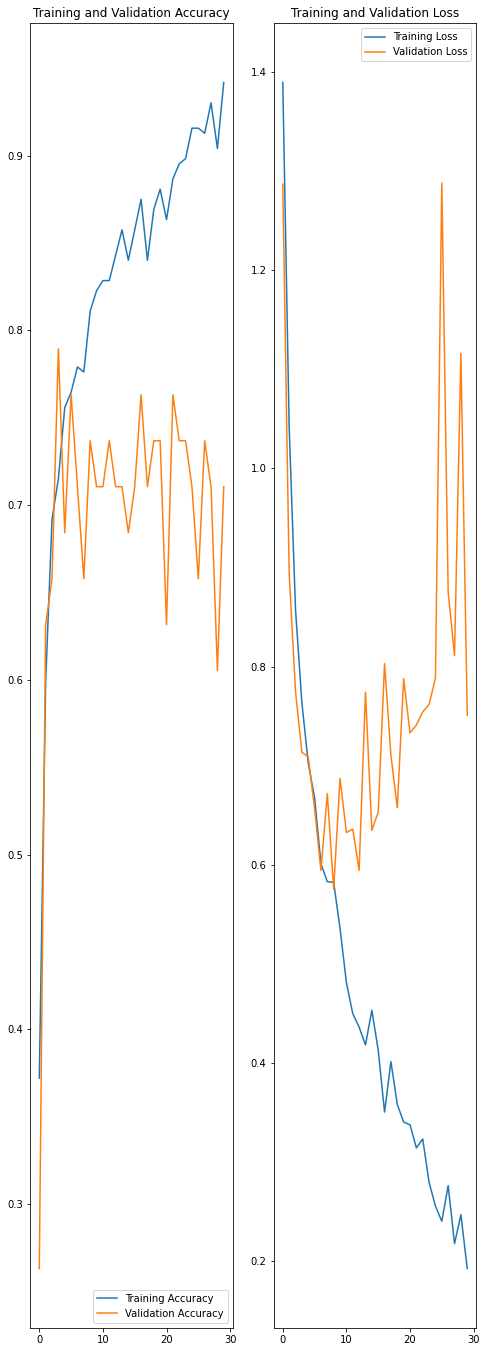

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 24))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
img = tf.keras.utils.load_img(
    r"C:\Users\dmife\Desktop\Z. Personal\Universirty\Diploma work\apple_disease_classification\Test\Normal_Apple\80.jpg",
    target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Normal_Apple with a 100.00 percent confidence.
